In [5]:
import pandas as pd
import numpy as np 
import plotly.express as px
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import dash_bootstrap_components as dbc

In [5]:
overall_comps = pd.read_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/all_scopes.csv")
scope1 = pd.read_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/scope1_sums.csv")
scope2= pd.read_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Tidy/scope2_sums.csv")

In [6]:
overall_comps

,Unnamed: 0.1,Unnamed: 0,Year,Scope_Total_MCTDEs,value
0,0,0,2006_2007,Scope 1,26957.8
1,1,1,2007_2008,Scope 1,28036.6
2,2,2,2008_2009,Scope 1,25290.9
3,3,3,2009_2010,Scope 1,16689.2
4,4,4,2010_2011,Scope 1,14505.3
...,...,...,...,...,...
103,103,103,2019_2020,Total,0.0
104,104,104,2020_2021,Total,11058.2
105,105,105,2021_2022,Total,10858.3
106,106,106,2022_2023,Total,8860.6


Oops more data cleaning necessary- need to convert values from text to numeric so they don't show up as categorical in our graphs 
For the overall GHGI inventory, the values representing offsets should be negative, but that was lost in the data cleaning process, so need to add back in for accuracy 

In [ ]:
#need to convert values from strings (text)to float (numbers with decimals)data types 
overall_comps['value']= overall_comps['value']str.replace(',', '')#first we need to remove commas from the values so that we don't confuse the computer
#^ we also re assign this back to the dataframe column so that it is saved in our data

overall_comps['value']= overall_comps['value'].astype(float).fillna(0.0)
#then we coerce the data to be a float type and make NA zeros 

In [ ]:
#now we need to isolate the offsets external/internal values to make them negative 
overall_comps[(overall_comps['Scope_Total_MCTDEs']=="Offsets Internal") | (overall_comps['Scope_Total_MCTDEs']=="Offsets External")]

In [8]:
scope1

,Unnamed: 0.1,Unnamed: 0,Year,Source_MCTDEs,value
0,0,0,2006_2007,#6 Fuel Oil,23876.0
1,1,1,2007_2008,#6 Fuel Oil,25145.0
2,2,2,2008_2009,#6 Fuel Oil,22366.0
3,3,3,2009_2010,#6 Fuel Oil,14041.0
4,4,4,2010_2011,#6 Fuel Oil,11272.0
...,...,...,...,...,...
155,155,155,2021_2022,Diesel,93.0
156,156,156,2022_2023,Diesel,92.0
157,157,157,2023_2024,Diesel,93.0
158,158,158,NaN,Diesel,89.0


In [9]:
scope2

,Unnamed: 0.1,Unnamed: 0,Year,Source_MTCDEs,value
0,0,0,2006_2007,Co-Generation,0.0
1,1,1,2007_2008,Co-Generation,0.0
2,2,2,2008_2009,Co-Generation,0.0
3,3,3,2009_2010,Co-Generation,0.0
4,4,4,2010_2011,Co-Generation,0.0
...,...,...,...,...,...
229,229,229,2019_2020,Scope 2 TOTAL,174.0
230,230,230,2020_2021,Scope 2 TOTAL,0.0
231,231,231,2021_2022,Scope 2 TOTAL,0.0
232,232,232,2022_2023,Scope 2 TOTAL,0.0


In [14]:
scope2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Year', 'Source_MTCDEs', 'value'], dtype='object')

In [17]:
fig = px.line(scope1, x= "Year" ,y= "value", color="Source_MCTDEs", color_discrete_sequence=px.colors.qualitative.Safe)
fig.show()

In [13]:
overall_comps

,Unnamed: 0.1,Unnamed: 0,Year,Scope_Total_MCTDEs,value
0,0,0,2006_2007,Scope 1,26957.8
1,1,1,2007_2008,Scope 1,28036.6
2,2,2,2008_2009,Scope 1,25290.9
3,3,3,2009_2010,Scope 1,16689.2
4,4,4,2010_2011,Scope 1,14505.3
...,...,...,...,...,...
103,103,103,2019_2020,Total,0.0
104,104,104,2020_2021,Total,11058.2
105,105,105,2021_2022,Total,10858.3
106,106,106,2022_2023,Total,8860.6


In [ ]:
scope2

In [3]:
scopes= pd.read_csv("/Users/jdeen@middlebury.edu/Documents/ENV_Dashboard/ENV_Dash/Data/Vizuals/scopes1_2_treemapform.csv")
scopes

,Unnamed: 0,Year,Source_MTCDEs,value,Scope_Type
0,0,2006_2007,#6 Fuel Oil,23876.0,Scope 1
1,1,2007_2008,#6 Fuel Oil,25145.0,Scope 1
2,2,2008_2009,#6 Fuel Oil,22366.0,Scope 1
3,3,2009_2010,#6 Fuel Oil,14041.0,Scope 1
4,4,2010_2011,#6 Fuel Oil,11272.0,Scope 1
...,...,...,...,...,...
389,229,2019_2020,Scope 2 TOTAL,174.0,Scope 2
390,230,2020_2021,Scope 2 TOTAL,0.0,Scope 2
391,231,2021_2022,Scope 2 TOTAL,0.0,Scope 2
392,232,2022_2023,Scope 2 TOTAL,0.0,Scope 2


In [31]:
scope1 = scopes[scopes['Scope_Type']== "Scope 1"]
scope2= scopes[(scopes['Scope_Type']== "Scope 2")&(scopes['Source_MTCDEs']!= 'Scope 2 TOTAL' )]

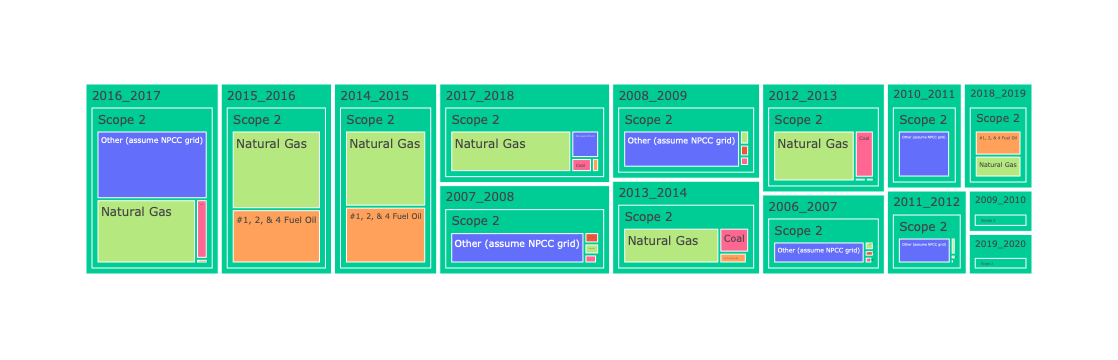

In [33]:
fig = px.treemap(scope2.dropna(), path= ['Year','Scope_Type','Source_MTCDEs'],values= 'value', color='Source_MTCDEs')
fig.show()